# Preprocessing

## Imports Modules

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metric
%matplotlib inline

## Load Data

In [22]:
raw_data = pd.read_csv("modified_merged_DDGData.csv")
display(raw_data)
for col in raw_data.columns:
    unique_types = set([type(i) for i in raw_data[col]])
    if len(unique_types) > 1:
        print('The column {} has mixed types'.format(col))
        print(unique_types)
        # print(raw_data[col].value_counts())


/var/folders/3f/85zthwnn17dfrdm_swynn0qr0000gn/T/ipykernel_7875/1805642834.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("modified_merged_DDGData.csv")


,Genomic Description (GRCh37),HGVS Nucleotide Change,HGVS Protein Change,Variant Classification,Phenotype,Consequence,Exon,Intron,Protein Position,Impact,CADD Phred,Interpro Domain,Max MAF (%),Max MAF Source,Surface Area,Normalized SA,Confidence Score,ddG,|ddG|
0,20:25275622:G>A,NM_015600.5:c.1202C>T,NP_056415.1:p.Ser401Leu,Likely benign,NaN,missense_variant,13/13,NaN,401,MODERATE,0.986,NaN,0.005012,gnomad_AF_eas_pass,83.106924,0.602629,37.05,0.6,0.6
1,20:25275628:A>C,NM_015600.5:c.1196T>G,NP_056415.1:p.Met399Arg,Likely benign,NaN,missense_variant,13/13,NaN,399,MODERATE,0.549,NaN,0.000879,gnomad_AF_nfe_pass,95.022767,0.438837,32.38,-0.5,0.5
2,20:25275631:C>T,NM_015600.5:c.1193G>A,NP_056415.1:p.Ser398Asn,Likely benign,NaN,missense_variant,13/13,NaN,398,MODERATE,12.240,NaN,0.002891,gnomad_AF_amr_pass,66.517272,0.482334,37.35,-0.1,0.1
3,20:25275632:T>A,NM_015600.5:c.1192A>T,NP_056415.1:p.Ser398Cys,Likely benign,NaN,missense_variant,13/13,NaN,398,MODERATE,12.590,NaN,0.000879,gnomad_AF_nfe_pass,66.517272,0.482334,37.35,-0.1,0.1
4,20:25275642:G>C,NM_015600.5:c.1182C>G,NP_056415.1:p.Ser394Arg,Likely benign,NaN,missense_variant,13/13,NaN,394,MODERATE,2.456,NaN,0.002637,gnomad_AF_nfe_pass,107.954090,0.782802,31.97,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128547,9:117267056:G>A,NM_015404.4:c.26C>T,NP_056219.3:p.Ser9Leu,Unknown significance,NaN,missense_variant,1/12,NaN,9,MODERATE,25.400,NaN,0.003069,gnomad_AF_nfe_pass,110.771214,0.803230,21.26,-0.2,0.2
128548,9:117267063:C>A,NM_015404.4:c.19G>T,NP_056219.3:p.Gly7Cys,Unknown significance,NaN,missense_variant,1/12,NaN,7,MODERATE,28.100,NaN,0.004056,gnomad_AF_nfe_pass,78.795922,0.826419,24.21,-0.1,0.1
128549,9:117267063:C>G,NM_015404.4:c.19G>C,NP_056219.3:p.Gly7Arg,Unknown significance,-,missense_variant,1/12,NaN,7,MODERATE,24.000,NaN,0.449622,gnomad_AF_afr_pass,78.795922,0.826419,24.21,0.1,0.1
128550,9:117267064:G>T,NM_015404.4:c.18C>A,NP_056219.3:p.Asp6Glu,Unknown significance,NaN,missense_variant,1/12,NaN,6,MODERATE,24.100,NaN,0.010393,gnomad_AF_sas_pass,126.685648,0.791885,22.61,-0.0,0.0


The column Phenotype has mixed types
{<class 'float'>, <class 'str'>}
The column Protein Position has mixed types
{<class 'int'>, <class 'str'>}
The column Interpro Domain has mixed types
{<class 'float'>, <class 'str'>}
The column Max MAF Source has mixed types
{<class 'float'>, <class 'str'>}


In [49]:
raw_data['Phenotype'] = raw_data['Phenotype'].astype(str)
raw_data['Protein Position'] = raw_data['Protein Position'].astype(int)

ValueError: invalid literal for int() with base 10: '2256-2257'

In [56]:
prot_pos = raw_data['Protein Position']

def to_int_with_try_except(x):
    try:
        return 

prot_pos.apply(lambda x: try: return int(x) except: return x)
# for idx, v in prot_pos.items():
#     print(v)
#     print(type(v))
    # if isinstance(v, str): print(idx, v)
    # print(idx, v)

SyntaxError: invalid syntax (2395507425.py, line 3)

## Preprocessing

### Drop Unused Columns
Has there been a featuer selection process to validate this?

In [8]:
raw_data = raw_data.drop(columns=['Genomic Description (GRCh37)', 'HGVS Nucleotide Change', 'HGVS Protein Change', 'Phenotype', 'Consequence', 'Exon', 'Intron', 'Protein Position', 'Impact', 'Interpro Domain', 'Max MAF Source', '|ddG|'])
raw_data

,Variant Classification,CADD Phred,Max MAF (%),Surface Area,Normalized SA,Confidence Score,ddG
0,Likely benign,0.986,0.005012,83.106924,0.602629,37.05,0.6
1,Likely benign,0.549,0.000879,95.022767,0.438837,32.38,-0.5
2,Likely benign,12.240,0.002891,66.517272,0.482334,37.35,-0.1
3,Likely benign,12.590,0.000879,66.517272,0.482334,37.35,-0.1
4,Likely benign,2.456,0.002637,107.954090,0.782802,31.97,0.2
...,...,...,...,...,...,...,...
128547,Unknown significance,25.400,0.003069,110.771214,0.803230,21.26,-0.2
128548,Unknown significance,28.100,0.004056,78.795922,0.826419,24.21,-0.1
128549,Unknown significance,24.000,0.449622,78.795922,0.826419,24.21,0.1
128550,Unknown significance,24.100,0.010393,126.685648,0.791885,22.61,-0.0


In [9]:
raw_data = raw_data[raw_data['Variant Classification'] != 'Unknown significance']
raw_data

,Variant Classification,CADD Phred,Max MAF (%),Surface Area,Normalized SA,Confidence Score,ddG
0,Likely benign,0.986,0.005012,83.106924,0.602629,37.05,0.6
1,Likely benign,0.549,0.000879,95.022767,0.438837,32.38,-0.5
2,Likely benign,12.240,0.002891,66.517272,0.482334,37.35,-0.1
3,Likely benign,12.590,0.000879,66.517272,0.482334,37.35,-0.1
4,Likely benign,2.456,0.002637,107.954090,0.782802,31.97,0.2
...,...,...,...,...,...,...,...
128530,Likely benign,15.980,0.005284,118.994686,0.935797,31.19,-0.0
128531,Likely benign,8.562,0.000000,118.994686,0.935797,31.19,-0.0
128534,Likely benign,20.200,0.006502,104.343442,1.094364,23.46,0.0
128537,Likely benign,22.300,0.000000,132.123393,1.039043,26.47,-0.1


In [5]:
raw_data = raw_data[raw_data['Variant Classification'] != 'Likely pathogenic']
raw_data

,Variant Classification,CADD Phred,Max MAF (%),Surface Area,Normalized SA,Confidence Score,ddG
0,Likely benign,0.986,0.005012,83.106924,0.602629,37.05,0.6
1,Likely benign,0.549,0.000879,95.022767,0.438837,32.38,-0.5
2,Likely benign,12.240,0.002891,66.517272,0.482334,37.35,-0.1
3,Likely benign,12.590,0.000879,66.517272,0.482334,37.35,-0.1
4,Likely benign,2.456,0.002637,107.954090,0.782802,31.97,0.2
...,...,...,...,...,...,...,...
128530,Likely benign,15.980,0.005284,118.994686,0.935797,31.19,-0.0
128531,Likely benign,8.562,0.000000,118.994686,0.935797,31.19,-0.0
128534,Likely benign,20.200,0.006502,104.343442,1.094364,23.46,0.0
128537,Likely benign,22.300,0.000000,132.123393,1.039043,26.47,-0.1


In [10]:
raw_data = raw_data.replace(['Likely benign'], '1') 
raw_data = raw_data.replace(['Benign*'], '1')
raw_data = raw_data.replace(['Benign'], '1') 
raw_data = raw_data.replace(['Pathogenic'], '0')

In [11]:
raw_data[raw_data['Variant Classification'] == 0].shape[0]
raw_data[raw_data['Variant Classification'] == 1].shape[0]
raw_data

,Variant Classification,CADD Phred,Max MAF (%),Surface Area,Normalized SA,Confidence Score,ddG
0,1,0.986,0.005012,83.106924,0.602629,37.05,0.6
1,1,0.549,0.000879,95.022767,0.438837,32.38,-0.5
2,1,12.240,0.002891,66.517272,0.482334,37.35,-0.1
3,1,12.590,0.000879,66.517272,0.482334,37.35,-0.1
4,1,2.456,0.002637,107.954090,0.782802,31.97,0.2
...,...,...,...,...,...,...,...
128530,1,15.980,0.005284,118.994686,0.935797,31.19,-0.0
128531,1,8.562,0.000000,118.994686,0.935797,31.19,-0.0
128534,1,20.200,0.006502,104.343442,1.094364,23.46,0.0
128537,1,22.300,0.000000,132.123393,1.039043,26.47,-0.1


In [12]:
raw_data.rename(columns = {'Variant Classification':'Class', 'Max MAF (%)':'MAF', '|ddG|': 'ddG'}, inplace = True)
raw_data

,Class,CADD Phred,MAF,Surface Area,Normalized SA,Confidence Score,ddG
0,1,0.986,0.005012,83.106924,0.602629,37.05,0.6
1,1,0.549,0.000879,95.022767,0.438837,32.38,-0.5
2,1,12.240,0.002891,66.517272,0.482334,37.35,-0.1
3,1,12.590,0.000879,66.517272,0.482334,37.35,-0.1
4,1,2.456,0.002637,107.954090,0.782802,31.97,0.2
...,...,...,...,...,...,...,...
128530,1,15.980,0.005284,118.994686,0.935797,31.19,-0.0
128531,1,8.562,0.000000,118.994686,0.935797,31.19,-0.0
128534,1,20.200,0.006502,104.343442,1.094364,23.46,0.0
128537,1,22.300,0.000000,132.123393,1.039043,26.47,-0.1


In [13]:
target_names=['0','1']
target_names

['0', '1']

In [15]:
raw_data = raw_data[raw_data['ddG'] != 'unknown']
raw_data

,Class,CADD Phred,MAF,Surface Area,Normalized SA,Confidence Score,ddG
0,1,0.986,0.005012,83.106924,0.602629,37.05,0.6
1,1,0.549,0.000879,95.022767,0.438837,32.38,-0.5
2,1,12.240,0.002891,66.517272,0.482334,37.35,-0.1
3,1,12.590,0.000879,66.517272,0.482334,37.35,-0.1
4,1,2.456,0.002637,107.954090,0.782802,31.97,0.2
...,...,...,...,...,...,...,...
128530,1,15.980,0.005284,118.994686,0.935797,31.19,-0.0
128531,1,8.562,0.000000,118.994686,0.935797,31.19,-0.0
128534,1,20.200,0.006502,104.343442,1.094364,23.46,0.0
128537,1,22.300,0.000000,132.123393,1.039043,26.47,-0.1


In [16]:
raw_scaled_data = raw_data.copy()
column = 'CADD Phred'
raw_scaled_data[column] = raw_scaled_data[column]/raw_scaled_data[column].abs().max()

In [17]:
path_points = raw_data[raw_data['Class'] == '0']
path_points = path_points.drop(columns=['MAF', 'Surface Area', 'Normalized SA', 'Confidence Score'] )
path_points



,Class,CADD Phred,ddG
25,0,24.40,-1.5
122,0,25.10,-0.1
148,0,24.00,1.5
159,0,26.20,-1.4
169,0,26.40,-1.6
...,...,...,...
127865,0,28.70,-0.2
127980,0,25.80,0.0
128039,0,32.00,-0.1
128329,0,17.09,-0.2


In [18]:
ben_points = raw_data[raw_data['Class'] == '1']
ben_points = ben_points.drop(columns=['MAF', 'Surface Area', 'Normalized SA', 'Confidence Score'] )
ben_points


,Class,CADD Phred,ddG
0,1,0.986,0.6
1,1,0.549,-0.5
2,1,12.240,-0.1
3,1,12.590,-0.1
4,1,2.456,0.2
...,...,...,...
128530,1,15.980,-0.0
128531,1,8.562,-0.0
128534,1,20.200,0.0
128537,1,22.300,-0.1


In [19]:
len(ben_points)

29717

In [20]:
len(path_points)

6349

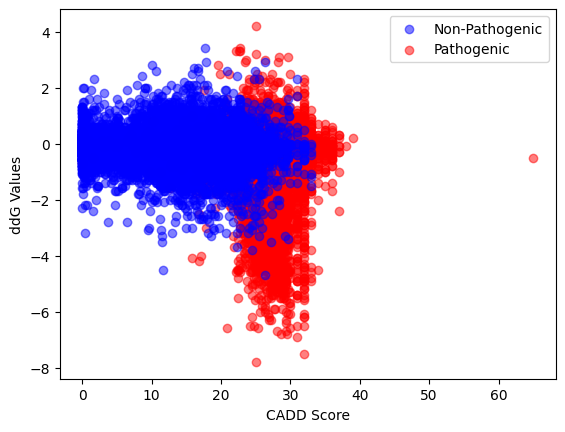

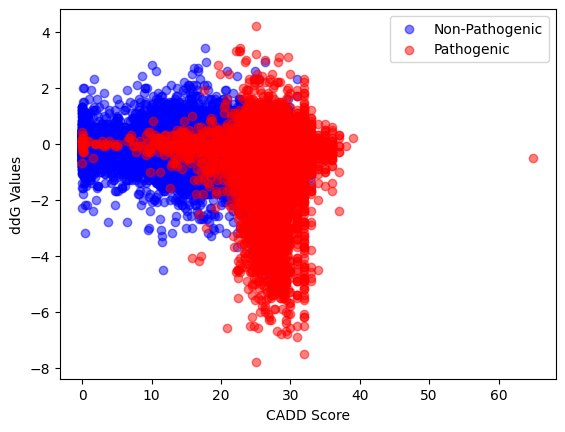

In [21]:
X1 = path_points['CADD Phred']
X2 = ben_points['CADD Phred']
Y1 = path_points['ddG']
Y2 = ben_points['ddG']
fig,ax = plt.subplots()
path_plot = plt.scatter(X1,Y1,color='r',alpha=0.5)
ben_plot = plt.scatter(X2,Y2,color='b',alpha = 0.5)
plt.xlabel("CADD Score")
plt.ylabel("ddG Values")
ax.legend([ben_plot, path_plot], ['Non-Pathogenic', 'Pathogenic'])

fig,ax = plt.subplots()
ben_plot = ax.scatter(X2,Y2,color='b',alpha=0.5)
path_plot = ax.scatter(X1,Y1,color='r',alpha=0.5)
plt.xlabel("CADD Score")
plt.ylabel("ddG Values")
ax.legend([ben_plot, path_plot], ['Non-Pathogenic', 'Pathogenic'])



In [22]:
len(path_points)

6349

In [23]:
path_points_scaled = raw_scaled_data[raw_scaled_data['Class'] == '0']
path_points_scaled = path_points_scaled.drop(columns=['MAF', 'Surface Area', 'Normalized SA', 'Confidence Score'] )
path_points_scaled

,Class,CADD Phred,ddG
25,0,0.375385,-1.5
122,0,0.386154,-0.1
148,0,0.369231,1.5
159,0,0.403077,-1.4
169,0,0.406154,-1.6
...,...,...,...
127865,0,0.441538,-0.2
127980,0,0.396923,0.0
128039,0,0.492308,-0.1
128329,0,0.262923,-0.2


In [24]:
ben_points_scaled = raw_scaled_data[raw_scaled_data['Class'] == '1']
ben_points_scaled = ben_points_scaled.drop(columns=['MAF', 'Surface Area', 'Normalized SA', 'Confidence Score'] )
ben_points_scaled

,Class,CADD Phred,ddG
0,1,0.015169,0.6
1,1,0.008446,-0.5
2,1,0.188308,-0.1
3,1,0.193692,-0.1
4,1,0.037785,0.2
...,...,...,...
128530,1,0.245846,-0.0
128531,1,0.131723,-0.0
128534,1,0.310769,0.0
128537,1,0.343077,-0.1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


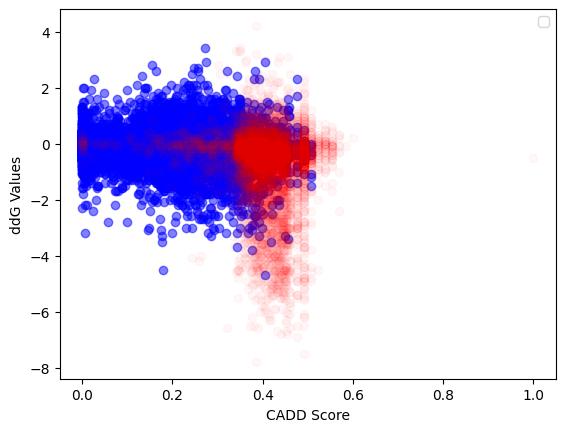

In [25]:
X1 = path_points_scaled['CADD Phred']
X2 = ben_points_scaled['CADD Phred']
Y1 = path_points_scaled['ddG']
Y2 = ben_points_scaled['ddG']

plt.scatter(X2,Y2,color='b',alpha=0.5)
plt.scatter(X1,Y1,color='r',alpha=0.03)

plt.xlabel("CADD Score")
plt.ylabel("ddG Values")
plt.legend()
plt.show()

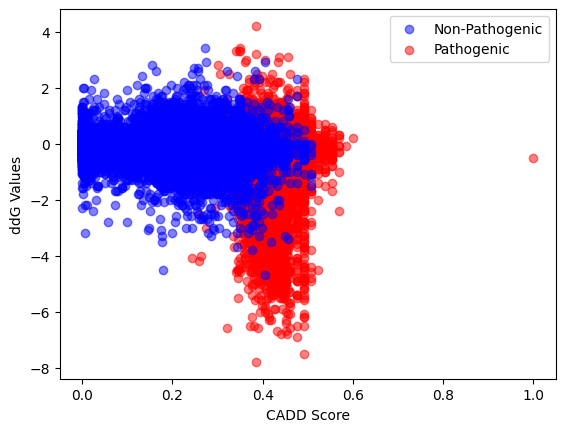

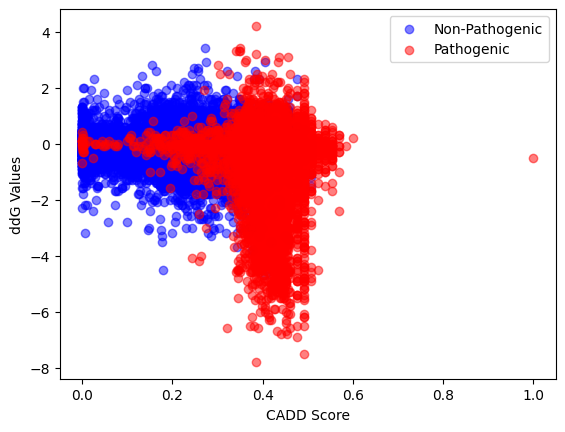

In [26]:
X1 = path_points_scaled['CADD Phred']
X2 = ben_points_scaled['CADD Phred']
Y1 = path_points_scaled['ddG']
Y2 = ben_points_scaled['ddG']
fig,ax = plt.subplots()
path3_plot = plt.scatter(X1,Y1,color='r',alpha=0.5)
ben3_plot = plt.scatter(X2,Y2,color='b',alpha = 0.5)
plt.xlabel("CADD Score")
plt.ylabel("ddG Values")
ax.legend([ben3_plot, path3_plot], ['Non-Pathogenic', 'Pathogenic'])

fig,ax = plt.subplots()
ben4_plot = ax.scatter(X2,Y2,color='b',alpha=0.5)
path4_plot = ax.scatter(X1,Y1,color='r',alpha=0.5)
plt.xlabel("CADD Score")
plt.ylabel("ddG Values")
ax.legend([ben4_plot, path4_plot], ['Non-Pathogenic', 'Pathogenic'])

In [27]:

# copy the data
path_points_max_scaled = path_points.copy()
  
# apply normalization techniques on Column 1
column = 'CADD Phred'
path_points_max_scaled[column] = path_points_max_scaled[column] /path_points_max_scaled[column].abs().max()
  
# view normalized data
display(path_points_max_scaled)


,Class,CADD Phred,ddG
25,0,0.375385,-1.5
122,0,0.386154,-0.1
148,0,0.369231,1.5
159,0,0.403077,-1.4
169,0,0.406154,-1.6
...,...,...,...
127865,0,0.441538,-0.2
127980,0,0.396923,0.0
128039,0,0.492308,-0.1
128329,0,0.262923,-0.2


In [29]:

# copy the data
ben_points_max_scaled = ben_points.copy()
  
# apply normalization techniques on Column 1
column = 'CADD Phred'
ben_points_max_scaled[column] = ben_points_max_scaled[column] /ben_points_max_scaled[column].abs().max()
  
# view normalized data
display(ben_points_max_scaled)

,Class,CADD Phred,ddG
0,1,0.029879,0.6
1,1,0.016636,-0.5
2,1,0.370909,-0.1
3,1,0.381515,-0.1
4,1,0.074424,0.2
...,...,...,...
128530,1,0.484242,-0.0
128531,1,0.259455,-0.0
128534,1,0.612121,0.0
128537,1,0.675758,-0.1


In [30]:
len(ben_points_max_scaled)

29717

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


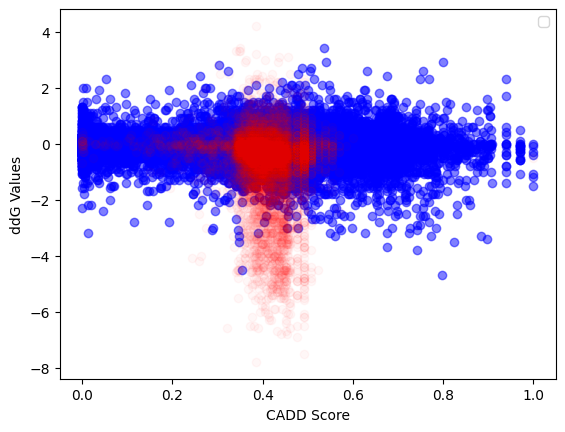

In [31]:
X1 = path_points_max_scaled['CADD Phred']
X2 = ben_points_max_scaled['CADD Phred']
Y1 = path_points_max_scaled['ddG']
Y2 = ben_points_max_scaled['ddG']

plt.scatter(X2,Y2,color='b',alpha=0.5)
plt.scatter(X1,Y1,color='r',alpha=0.03)

plt.xlabel("CADD Score")
plt.ylabel("ddG Values")
plt.legend()
plt.show()

In [33]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
np.random.seed(500)
y = raw_data['Class']
X = raw_data.drop('Class',axis=1)


imputer = SimpleImputer(strategy='constant',fill_value=0, missing_values=np.nan)
imputer = imputer.fit(X[['CADD Phred','MAF','Surface Area','Normalized SA','Confidence Score','ddG']])
X[['CADD Phred','MAF','Surface Area','Normalized SA','Confidence Score','ddG']]=imputer.transform(X[['CADD Phred','MAF','Surface Area','Normalized SA','Confidence Score','ddG']])


In [34]:
len(y)

38513

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',probability=True)
svclassifier.fit(X_train, y_train)
#importance = svclassifier.coef_
#print(importance)

In [ ]:
y_pred_prob = svclassifier.predict_proba(X_test)
y_pred_prob
y_pred=svclassifier.predict(X_test)
display(pd.DataFrame({'svclassifier.predict': y_pred,
                     'svclassifier.predict_prob_a[:,0] (Pathogenic)': y_pred_prob[:,0],
                     'svclassifier.predict_prob_a[:,1] (Non-Pathogenic)': y_pred_prob[:,1]}).head(100))
y_predictions_prob_a = y_pred_prob[:,0]

,svclassifier.predict,"svclassifier.predict_prob_a[:,0] (Pathogenic)","svclassifier.predict_prob_a[:,1] (Non-Pathogenic)"
0,1,3.911656e-03,0.996088
1,1,1.566712e-02,0.984333
2,1,5.142153e-07,0.999999
3,1,2.021945e-11,1.000000
4,0,7.472517e-01,0.252748
...,...,...,...
95,1,2.968970e-02,0.970310
96,1,3.526169e-01,0.647383
97,1,7.867992e-02,0.921320
98,1,4.080664e-06,0.999996


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1063  188]
 [  85 5878]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1251
           1       0.97      0.99      0.98      5963

    accuracy                           0.96      7214
   macro avg       0.95      0.92      0.93      7214
weighted avg       0.96      0.96      0.96      7214



In [ ]:
svclassifier.score(X_train, y_train)

0.9608346041868848

Confusion matrix, without normalization
[[ 4300   798]
 [  332 23422]]


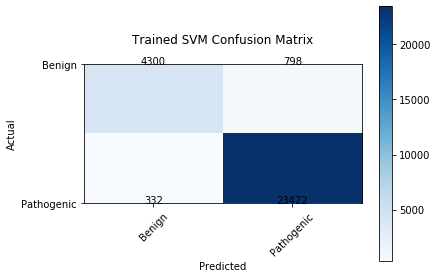

In [ ]:
y_pred=svclassifier.predict(X_train)
y_pred
y_true = y_train
y_true

metric.accuracy_score(y_true, y_pred, normalize=False)

cnf_matrix=metric.confusion_matrix(y_true, y_pred)
cnf_matrix

import itertools

# code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Trained SVM Confusion Matrix\n',
                          labels = ['Benign','Pathogenic'],
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, ['Benign','Pathogenic'], rotation=45)
    plt.yticks(tick_marks, ['Benign','Pathogenic'])

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False)
plt.show()

Confusion matrix, without normalization
[[1063  188]
 [  85 5878]]


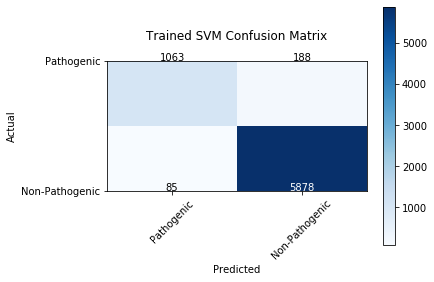

In [ ]:
y_pred=svclassifier.predict(X_test)
y_pred
y_true = y_test
y_true

metric.accuracy_score(y_true, y_pred, normalize=False)

cnf_matrix=metric.confusion_matrix(y_true, y_pred)
cnf_matrix

import itertools

# code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Trained SVM Confusion Matrix\n',
                          labels = ['Pathogenic','Benign'],
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, ['Pathogenic','Non-Pathogenic'], rotation=45)
    plt.yticks(tick_marks, ['Pathogenic','Non-Pathogenic'])

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[j, i] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False)
plt.show()

In [ ]:
display(({'Likely pathogenics predicted pathogenic: ': np.count_nonzero(y_pred == '1'),
                     'Likely pathogenics predicted benign: ': np.count_nonzero(y_pred == '0')}))

{'Likely pathogenics predicted pathogenic: ': 1151,
 'Likely pathogenics predicted benign: ': 6063}

In [ ]:
raw_data = pd.read_csv("modified_merged_DDGData.csv")
raw_data

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Genomic Description (GRCh37),HGVS Nucleotide Change,HGVS Protein Change,Variant Classification,Phenotype,Consequence,Exon,Intron,Protein Position,Impact,CADD Phred,Interpro Domain,Max MAF (%),Max MAF Source,Surface Area,Normalized SA,Confidence Score,ddG,|ddG|
0,20:25275622:G>A,NM_015600.5:c.1202C>T,NP_056415.1:p.Ser401Leu,Likely benign,NaN,missense_variant,13/13,NaN,401,MODERATE,0.986,NaN,0.005012,gnomad_AF_eas_pass,83.106924,0.602629,37.05,0.6,0.6
1,20:25275628:A>C,NM_015600.5:c.1196T>G,NP_056415.1:p.Met399Arg,Likely benign,NaN,missense_variant,13/13,NaN,399,MODERATE,0.549,NaN,0.000879,gnomad_AF_nfe_pass,95.022767,0.438837,32.38,-0.5,0.5
2,20:25275631:C>T,NM_015600.5:c.1193G>A,NP_056415.1:p.Ser398Asn,Likely benign,NaN,missense_variant,13/13,NaN,398,MODERATE,12.240,NaN,0.002891,gnomad_AF_amr_pass,66.517272,0.482334,37.35,-0.1,0.1
3,20:25275632:T>A,NM_015600.5:c.1192A>T,NP_056415.1:p.Ser398Cys,Likely benign,NaN,missense_variant,13/13,NaN,398,MODERATE,12.590,NaN,0.000879,gnomad_AF_nfe_pass,66.517272,0.482334,37.35,-0.1,0.1
4,20:25275642:G>C,NM_015600.5:c.1182C>G,NP_056415.1:p.Ser394Arg,Likely benign,NaN,missense_variant,13/13,NaN,394,MODERATE,2.456,NaN,0.002637,gnomad_AF_nfe_pass,107.954090,0.782802,31.97,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128547,9:117267056:G>A,NM_015404.4:c.26C>T,NP_056219.3:p.Ser9Leu,Unknown significance,NaN,missense_variant,1/12,NaN,9,MODERATE,25.400,NaN,0.003069,gnomad_AF_nfe_pass,110.771214,0.803230,21.26,-0.2,0.2
128548,9:117267063:C>A,NM_015404.4:c.19G>T,NP_056219.3:p.Gly7Cys,Unknown significance,NaN,missense_variant,1/12,NaN,7,MODERATE,28.100,NaN,0.004056,gnomad_AF_nfe_pass,78.795922,0.826419,24.21,-0.1,0.1
128549,9:117267063:C>G,NM_015404.4:c.19G>C,NP_056219.3:p.Gly7Arg,Unknown significance,-,missense_variant,1/12,NaN,7,MODERATE,24.000,NaN,0.449622,gnomad_AF_afr_pass,78.795922,0.826419,24.21,0.1,0.1
128550,9:117267064:G>T,NM_015404.4:c.18C>A,NP_056219.3:p.Asp6Glu,Unknown significance,NaN,missense_variant,1/12,NaN,6,MODERATE,24.100,NaN,0.010393,gnomad_AF_sas_pass,126.685648,0.791885,22.61,-0.0,0.0


In [ ]:
raw_data = raw_data.drop(columns=['Genomic Description (GRCh37)', 'HGVS Nucleotide Change', 'HGVS Protein Change', 'Phenotype', 'Consequence', 'Exon', 'Intron', 'Protein Position', 'Impact', 'Interpro Domain', 'Max MAF Source', 'ddG'])
raw_data

,Variant Classification,CADD Phred,Max MAF (%),Surface Area,Normalized SA,Confidence Score,|ddG|
0,Likely benign,0.986,0.005012,83.106924,0.602629,37.05,0.6
1,Likely benign,0.549,0.000879,95.022767,0.438837,32.38,0.5
2,Likely benign,12.240,0.002891,66.517272,0.482334,37.35,0.1
3,Likely benign,12.590,0.000879,66.517272,0.482334,37.35,0.1
4,Likely benign,2.456,0.002637,107.954090,0.782802,31.97,0.2
...,...,...,...,...,...,...,...
128547,Unknown significance,25.400,0.003069,110.771214,0.803230,21.26,0.2
128548,Unknown significance,28.100,0.004056,78.795922,0.826419,24.21,0.1
128549,Unknown significance,24.000,0.449622,78.795922,0.826419,24.21,0.1
128550,Unknown significance,24.100,0.010393,126.685648,0.791885,22.61,0.0


In [ ]:
raw_data = raw_data[raw_data['Variant Classification'] == 'Likely pathogenic']
raw_data

,Variant Classification,CADD Phred,Max MAF (%),Surface Area,Normalized SA,Confidence Score,|ddG|
11,Likely pathogenic,18.13,0.000000,245.759481,1.196479,36.80,0.0
69,Likely pathogenic,29.80,0.000000,28.808985,0.183147,98.12,0.1
123,Likely pathogenic,26.90,0.010155,0.000000,0.000000,98.87,1.0
143,Likely pathogenic,19.92,0.040093,132.574605,0.842612,94.72,0.1
320,Likely pathogenic,24.80,0.000000,0.000000,0.000000,98.35,3.3
...,...,...,...,...,...,...,...
127961,Likely pathogenic,28.60,0.005442,25.217543,0.129141,90.72,0.6
128108,Likely pathogenic,22.30,0.292656,99.958532,0.724825,23.34,0.1
128253,Likely pathogenic,22.90,0.000000,110.236879,0.689067,90.39,0.3
128287,Likely pathogenic,18.51,0.000000,107.478324,0.779353,31.40,0.1


In [ ]:
raw_data.rename(columns = {'Variant Classification':'Class', 'Max MAF (%)':'MAF', '|ddG|': 'ddG'}, inplace = True)
raw_data

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Class,CADD Phred,MAF,Surface Area,Normalized SA,Confidence Score,ddG
11,Likely pathogenic,18.13,0.000000,245.759481,1.196479,36.80,0.0
69,Likely pathogenic,29.80,0.000000,28.808985,0.183147,98.12,0.1
123,Likely pathogenic,26.90,0.010155,0.000000,0.000000,98.87,1.0
143,Likely pathogenic,19.92,0.040093,132.574605,0.842612,94.72,0.1
320,Likely pathogenic,24.80,0.000000,0.000000,0.000000,98.35,3.3
...,...,...,...,...,...,...,...
127961,Likely pathogenic,28.60,0.005442,25.217543,0.129141,90.72,0.6
128108,Likely pathogenic,22.30,0.292656,99.958532,0.724825,23.34,0.1
128253,Likely pathogenic,22.90,0.000000,110.236879,0.689067,90.39,0.3
128287,Likely pathogenic,18.51,0.000000,107.478324,0.779353,31.40,0.1


In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
X2 = raw_data.drop('Class',axis=1)
imputer2 = SimpleImputer(strategy='constant',fill_value=0, missing_values=np.nan)
imputer2 = imputer2.fit(X[['CADD Phred','MAF','Surface Area','Normalized SA','Confidence Score','ddG']])


X2[['CADD Phred','MAF','Surface Area','Normalized SA','Confidence Score','ddG']]=imputer2.transform(X2[['CADD Phred','MAF','Surface Area','Normalized SA','Confidence Score','ddG']])

In [ ]:
svclassifier.predict(X2)

array(['0', '1', '1', ..., '0', '0', '0'], dtype=object)

In [ ]:
y_pred_prob2 = svclassifier.predict_proba(X2)
y_pred_prob2
y_pred2=svclassifier.predict(X2)
display(pd.DataFrame({'svclassifier.predict': y_pred2,
                     'svclassifier.predict_prob_a[:,0] (Benign)': y_pred_prob2[:,0],
                     'svclassifier.predict_prob_a[:,1] (Pathogenic)': y_pred_prob2[:,1]}).head(100))
y_predictions_prob_a2 = y_pred_prob2[:,0]

,svclassifier.predict,"svclassifier.predict_prob_a[:,0] (Benign)","svclassifier.predict_prob_a[:,1] (Pathogenic)"
0,0,0.985913,0.013901
1,1,0.027781,0.970342
2,1,0.060484,0.937612
3,0,0.880608,0.118519
4,1,0.044350,0.953898
...,...,...,...
95,1,0.069210,0.929004
96,0,0.825691,0.171717
97,1,0.406731,0.589473
98,1,0.048550,0.949699


In [ ]:
len(y_pred2 == 1)

np.count_nonzero(y_pred2 == '1')

display(({'Likely pathogenics predicted pathogenic: ': np.count_nonzero(y_pred2 == '1'),
                     'Likely pathogenics predicted benign: ': np.count_nonzero(y_pred2 == '0')}))

{'Likely pathogenics predicted pathogenic: ': 1802,
 'Likely pathogenics predicted benign: ': 645}